In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [13]:
df = pd.read_csv("./bases/suicide/master.csv") 
filtro = df.year > 1999
filtro2 = df.year < 2016
df = df[filtro & filtro2]
df = df.groupby(['country','year','age','sex'], as_index=False)['suicides_no','population'].sum()
df = df.set_index(['country','year','age','sex'])
df = df.reindex( pd.MultiIndex.from_product([df.index.levels[0],df.index.levels[1],df.index.levels[2],df.index.levels[3]], names=['country', 'year','age','sex']),fill_value=np.nan).reset_index()
func = lambda x:x.suicides_no.isna()
series = df[func].reset_index().groupby(['country','sex'])['year'].count()
lista = list(series[series > 30].index)
filtro3 = df.country.isin(lista)
df = df[~filtro3]
def limpa_idade(age):
    return age[:-6]
df['age'] = df['age'].apply(limpa_idade)

,country,year,age,sex,suicides_no,population
6,Albania,2000,5-14,female,0.0,324700.0
18,Albania,2001,5-14,female,2.0,307356.0
30,Albania,2002,5-14,female,1.0,304850.0
42,Albania,2003,5-14,female,0.0,298477.0
54,Albania,2004,5-14,female,3.0,286705.0
66,Albania,2005,5-14,female,0.0,276559.0
78,Albania,2006,5-14,female,0.0,267316.0
90,Albania,2007,5-14,female,0.0,256808.0
102,Albania,2008,5-14,female,1.0,246288.0
114,Albania,2009,5-14,female,0.0,236174.0


In [14]:
def preenche_nan(df):
    rdfs= pd.melt(df.pivot_table('suicides_no', ['country','sex'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country",'sex'], var_name="year", value_name="suicides")
    rdfp = pd.melt(df.pivot_table('population', ['country','sex'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country",'sex'], var_name="year", value_name="population")
    result = rdfs.merge(rdfp).sort_values(['country','year']).reset_index(drop=True)
    result['suicide100'] = (result['suicides'] * 100000 ) / result['population']
    return result

df1f = preenche_nan(df[(df.age == '5-14') & (df.sex == 'female')])
df2f = preenche_nan(df[(df.age == '15-24') & (df.sex == 'female')])
df3f = preenche_nan(df[(df.age == '25-34') & (df.sex == 'female')])
df4f = preenche_nan(df[(df.age == '35-54') & (df.sex == 'female')])
df5f = preenche_nan(df[(df.age == '55-74') & (df.sex == 'female')])
df6f = preenche_nan(df[(df.age == '75+') & (df.sex == 'female')])
df1m = preenche_nan(df[(df.age == '5-14') & (df.sex == 'male')])
df2m = preenche_nan(df[(df.age == '15-24') & (df.sex == 'male')])
df3m = preenche_nan(df[(df.age == '25-34') & (df.sex == 'male')])
df4m = preenche_nan(df[(df.age == '35-54') & (df.sex == 'male')])
df5m = preenche_nan(df[(df.age == '55-74') & (df.sex == 'male')])
df6m = preenche_nan(df[(df.age == '75+') & (df.sex == 'male')])
df1fw = df1f.groupby('year').agg(np.sum).reset_index()
df1fw['suicide100'] = (df1fw['suicides'] * 100000 ) / df1fw['population']
df2fw = df2f.groupby('year').agg(np.sum).reset_index()
df2fw['suicide100'] = (df2fw['suicides'] * 100000 ) / df2fw['population']
df3fw = df3f.groupby('year').agg(np.sum).reset_index()
df3fw['suicide100'] = (df3fw['suicides'] * 100000 ) / df3fw['population']
df4fw = df4f.groupby('year').agg(np.sum).reset_index()
df4fw['suicide100'] = (df4fw['suicides'] * 100000 ) / df4fw['population']
df5fw = df5f.groupby('year').agg(np.sum).reset_index()
df5fw['suicide100'] = (df5fw['suicides'] * 100000 ) / df5fw['population']
df6fw = df6f.groupby('year').agg(np.sum).reset_index()
df6fw['suicide100'] = (df6fw['suicides'] * 100000 ) / df6fw['population']
df1mw = df1m.groupby('year').agg(np.sum).reset_index()
df1mw['suicide100'] = (df1mw['suicides'] * 100000 ) / df1mw['population']
df2mw = df2m.groupby('year').agg(np.sum).reset_index()
df2mw['suicide100'] = (df2mw['suicides'] * 100000 ) / df2mw['population']
df3mw = df3m.groupby('year').agg(np.sum).reset_index()
df3mw['suicide100'] = (df3mw['suicides'] * 100000 ) / df3mw['population']
df4mw = df4m.groupby('year').agg(np.sum).reset_index()
df4mw['suicide100'] = (df4mw['suicides'] * 100000 ) / df4mw['population']
df5mw = df5m.groupby('year').agg(np.sum).reset_index()
df5mw['suicide100'] = (df5mw['suicides'] * 100000 ) / df5mw['population']
df6mw = df6m.groupby('year').agg(np.sum).reset_index()
df6mw['suicide100'] = (df6mw['suicides'] * 100000 ) / df6mw['population']

Text(0, 0.5, 'suicidio por 100.000')

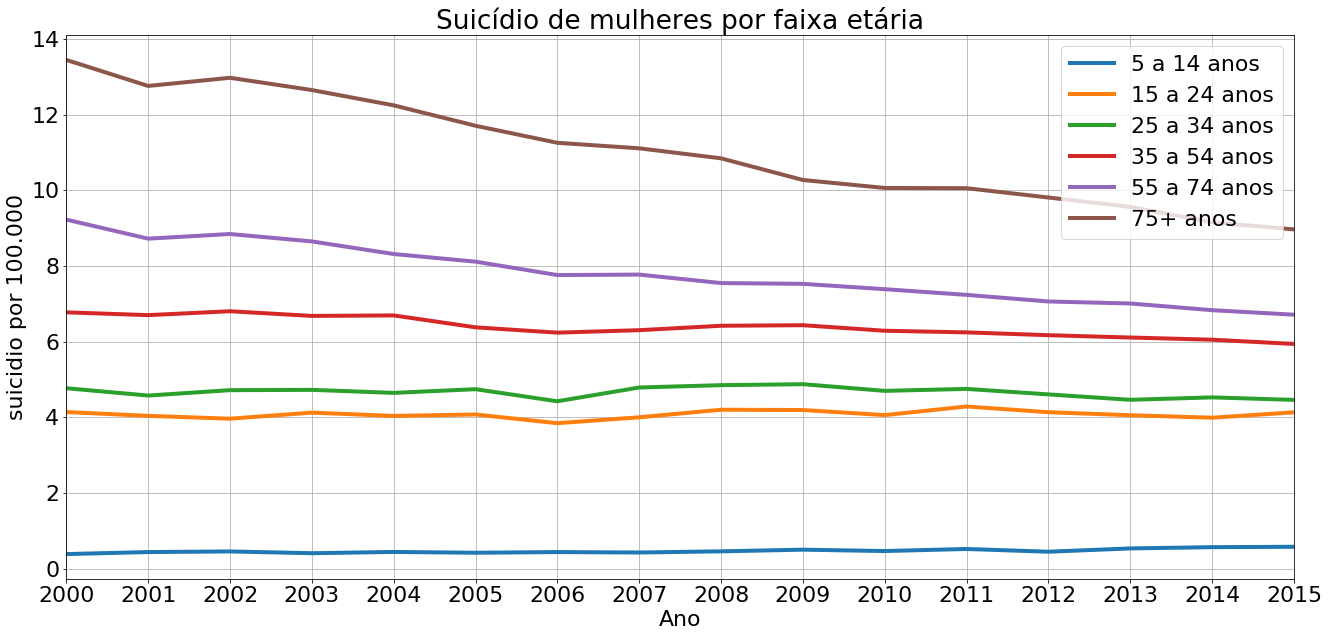

In [17]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio de mulheres por faixa etária")
df1fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,yticks=range(26,-2,-2),label='5 a 14 anos')
df2fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,xticks=range(2000,2016), label='15 a 24 anos')
df3fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='25 a 34 anos')
df4fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='35 a 54 anos')
df5fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='55 a 74 anos')
df6fw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")

Text(0, 0.5, 'suicidio por 100.000')

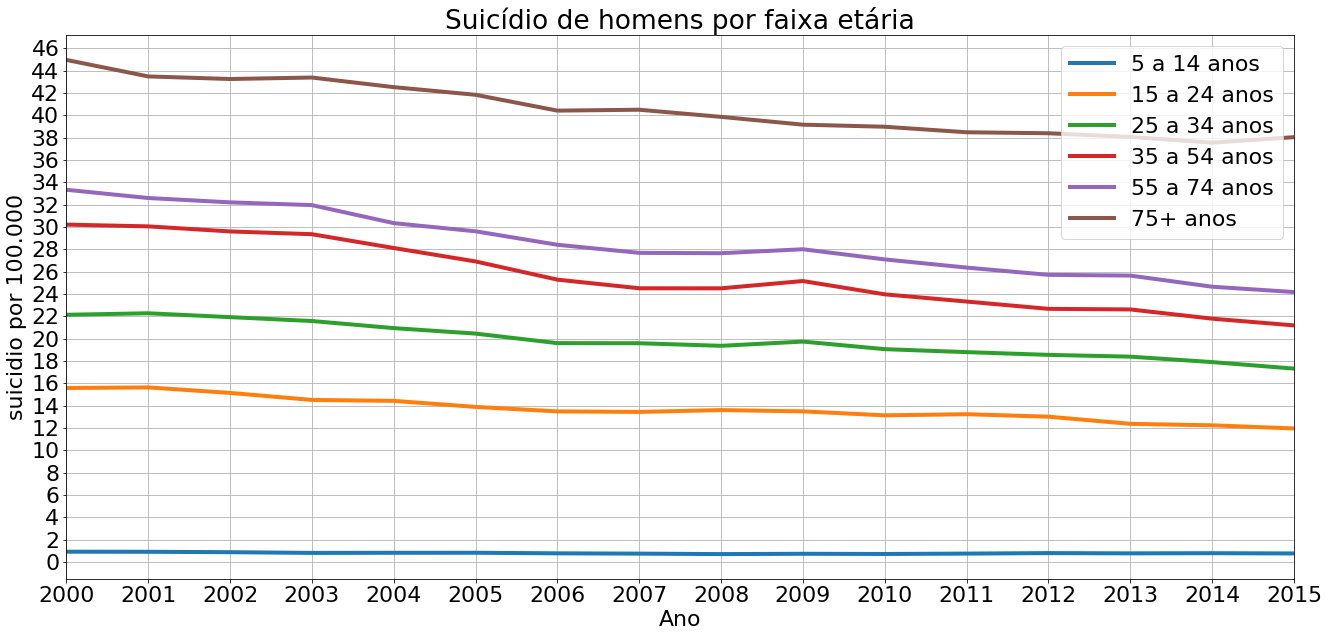

In [22]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio de homens por faixa etária")
df1mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,yticks=range(46,-2,-2),label='5 a 14 anos')
df2mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,xticks=range(2000,2016), label='15 a 24 anos')
df3mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='25 a 34 anos')
df4mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='35 a 54 anos')
df5mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='55 a 74 anos')
df6mw.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")

In [26]:
df2 = pd.read_csv("./bases/wdi/Indicators.csv")

In [27]:
filtro = df2.IndicatorCode.isin(['SP.DYN.LE00.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN'])
filtro2 = df2.Year > 1999 
filtro3 = df2.Year < 2016
df2 = df2[filtro & filtro3 & filtro4]
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro4 = df2.CountryName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)
df2.rename(columns={'CountryName':'country','CountryCode':'coyntrycode'}, inplace=True)

/home/nicoedu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0, 0.5, 'Anos de vida')

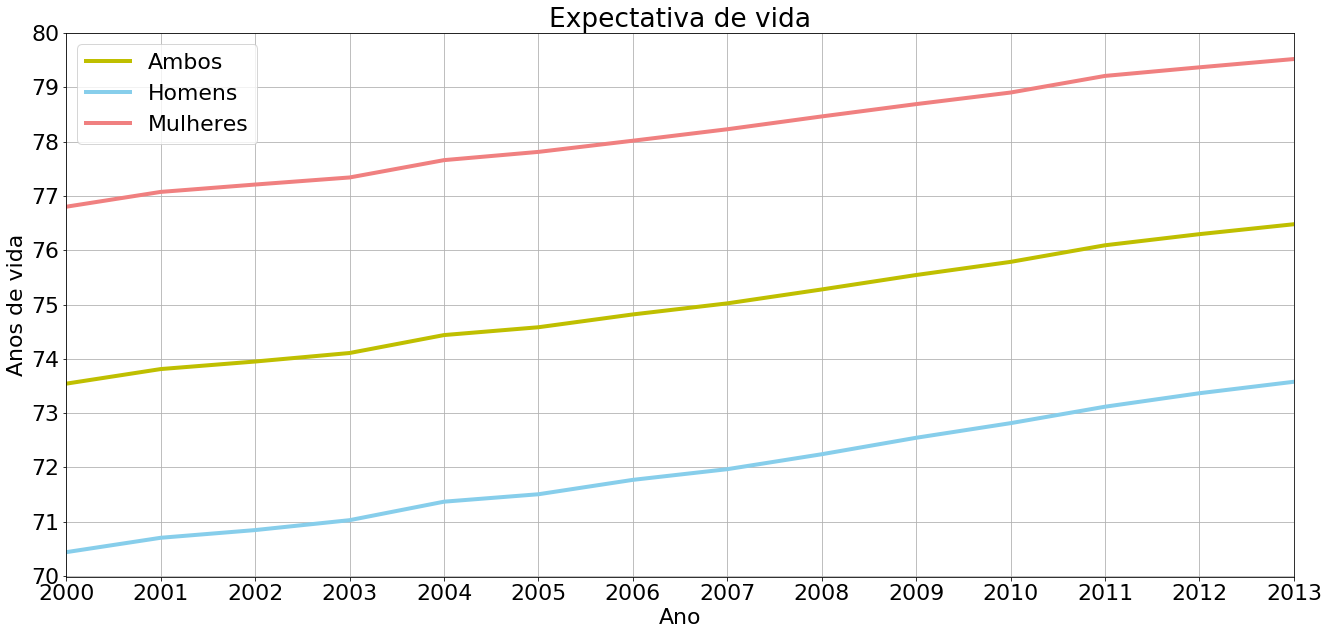

In [120]:
dfex = df2.groupby(['Year','IndicatorCode']).agg(np.mean).reset_index()
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Expectativa de vida")
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax,xticks=range(2000,2014), color='y', linewidth=4, label='Ambos')
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.MA.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, linestyle='-', color='skyblue', linewidth=4, label='Homens')
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.FE.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, yticks=range(70,81),linestyle='-', color='lightcoral', linewidth=4, label='Mulheres')
ax.set_xlabel("Ano")
ax.set_ylabel("Anos de vida")

In [117]:
dfexm = dfex[dfex['IndicatorCode'] == 'SP.DYN.LE00.MA.IN']
temp =  df4mw[df4mw.year < 2014][['year','suicide100']]
temp1 = df5mw[df5mw.year < 2014][['year','suicide100']]
temp2 = df6mw[df6mw.year < 2014][['year','suicide100']]
temp3 = dfexm[['Year','Value']].reset_index(drop=True)
#temp.corrwith(temp3['Value'], axis = 0) 
#temp1.corrwith(temp3, axis = 0) 
temp2.corrwith(temp3['Value'], axis = 0) 

year          0.997862
suicide100   -0.977070
dtype: float64

Text(0, 0.5, 'Anos de vida')

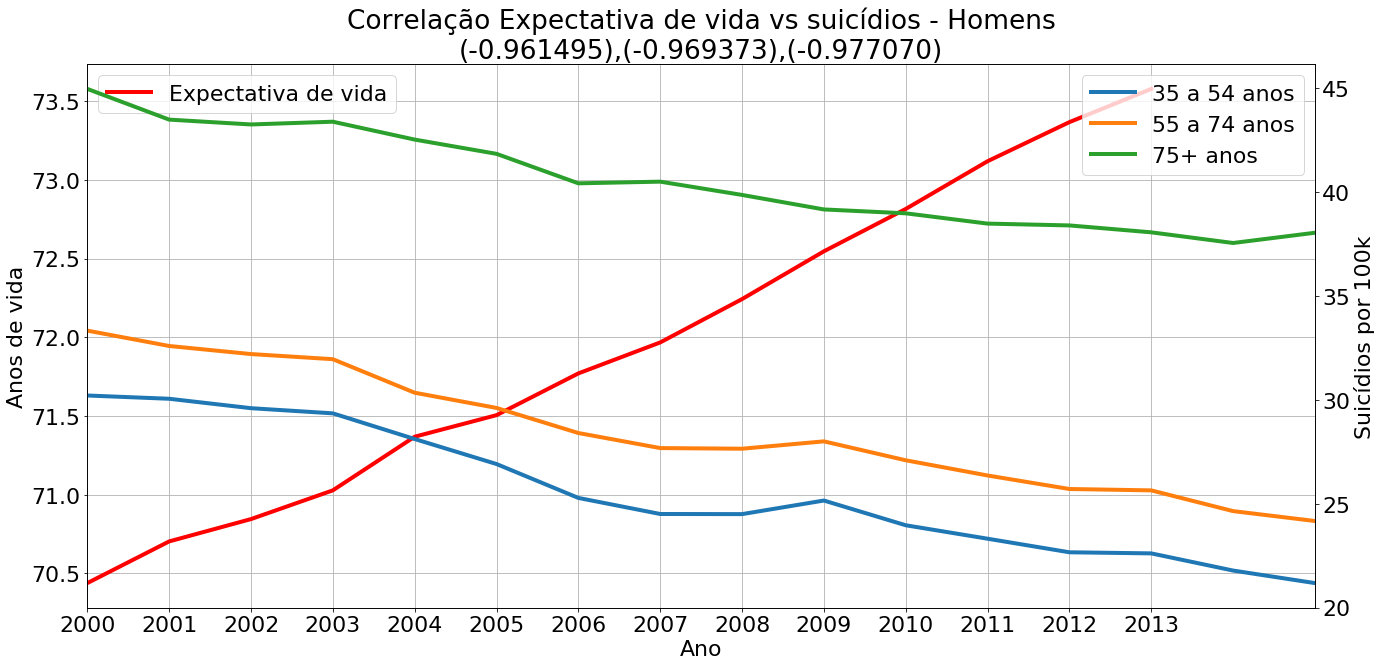

In [125]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Correlação Expectativa de vida vs suicídios - Homens\n(-0.961495),(-0.969373),(-0.977070)")

temp3.plot('Year','Value',grid=True, ax=ax,xticks=range(2000,2014),color='red',linewidth=4,label='Expectativa de vida')

ax2 = ax.twinx()
ax2.set_ylabel("Suicídios por 100k")
df4mw.plot(x='year', y='suicide100',linewidth=4, ax=ax2, label='35 a 54 anos')
df5mw.plot(x='year', y='suicide100',linewidth=4, ax=ax2,label='55 a 74 anos')
df6mw.plot(x='year', y='suicide100',linewidth=4, ax=ax2, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("Anos de vida")

Text(0, 0.5, 'Anos de vida')

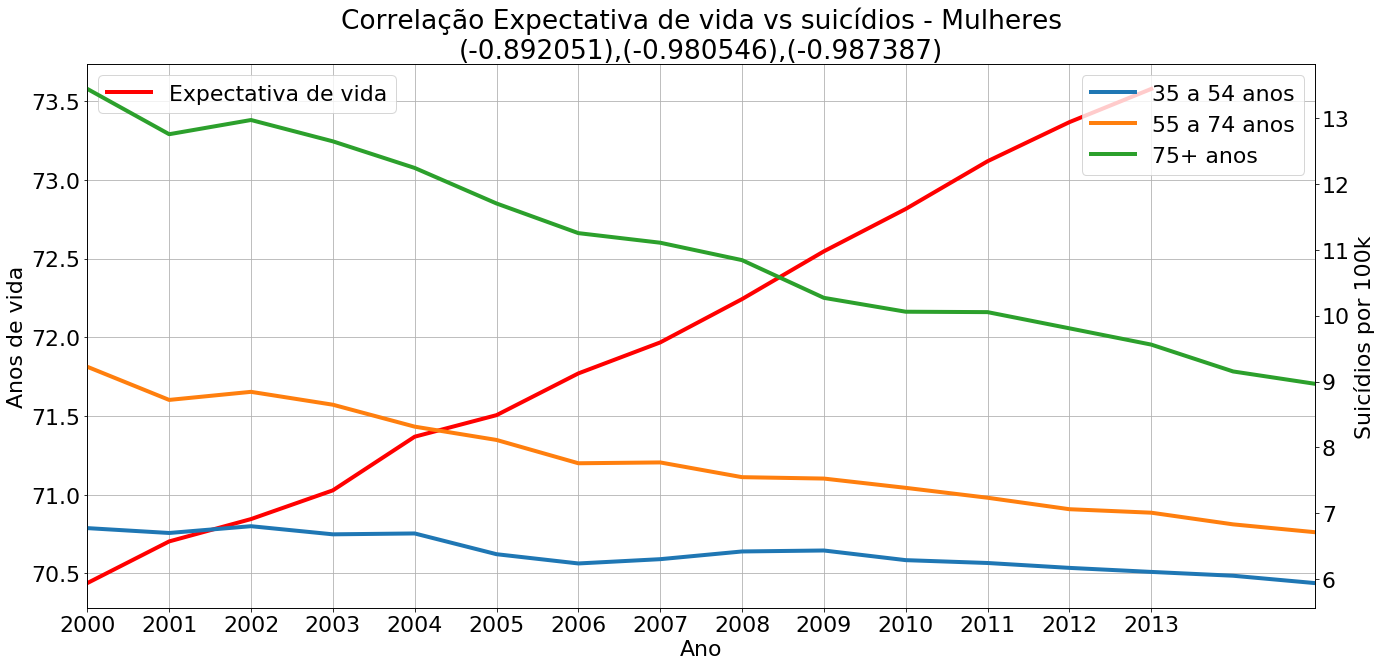

In [137]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Correlação Expectativa de vida vs suicídios - Mulheres\n(-0.892051),(-0.980546),(-0.987387)")
dfexm = dfex[dfex['IndicatorCode'] == 'SP.DYN.LE00.MA.IN'][['Year','Value']].reset_index(drop=True)
dfexm.plot('Year','Value', grid=True, ax=ax,xticks=range(2000,2014),color='red',linewidth=4,label='Expectativa de vida')

ax2 = ax.twinx()
ax2.set_ylabel("Suicídios por 100k")
df4fw.plot(x='year', y='suicide100',linewidth=4,xticks=range(2000,2014), ax=ax2, label='35 a 54 anos')
df5fw.plot(x='year', y='suicide100',linewidth=4,xticks=range(2000,2014), ax=ax2,label='55 a 74 anos')
df6fw.plot(x='year', y='suicide100',linewidth=4,xticks=range(2000,2014), ax=ax2, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("Anos de vida")

In [135]:
dfexm = dfex[dfex['IndicatorCode'] == 'SP.DYN.LE00.FE.IN']
temp =  df4fw[df4mw.year < 2014][['year','suicide100']]
temp1 = df5fw[df5mw.year < 2014][['year','suicide100']]
temp2 = df6fw[df6mw.year < 2014][['year','suicide100']]
temp3 = dfexm[['Year','Value']].reset_index(drop=True)
#temp.corrwith(temp3['Value'], axis = 0) 
#temp1.corrwith(temp3['Value'], axis = 0) 
temp2.corrwith(temp3['Value'], axis = 0) 

year          0.998614
suicide100   -0.987387
dtype: float64